##Tirmzi Analysis
n=1000 m+=1000 nm-=120 istep= 4 min=150 max=700

In [1]:
import sys
sys.path
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import signal

In [2]:
ls

 Volume in drive C is Local Disk
 Volume Serial Number is AA1B-997A

 Directory of C:\Users\emaro\OneDrive - University of Mount Union\XSEDE Summer 2021\xsede-spm\data

08/05/2021  10:42 AM    <DIR>          .
08/05/2021  10:42 AM    <DIR>          ..
08/05/2021  10:40 AM    <DIR>          .ipynb_checkpoints
08/02/2021  02:01 PM    <DIR>          0309-VariedNuni_8_2_2021-0000
08/02/2021  02:15 PM    <DIR>          8_2_2021
08/02/2021  03:39 PM           161,361 8_2_2021_FortranErequals1.ipynb
08/03/2021  01:17 PM           130,779 8_2_2021_PythonErequals1.ipynb
08/02/2021  02:58 PM           130,726 8_2_2021_PythonVariedNuni.ipynb
08/04/2021  02:42 PM           130,779 8_2_2021_PythonVariedNuni-Copy3.ipynb
08/02/2021  02:52 PM    <DIR>          8_2_2021P
08/03/2021  03:01 PM           225,696 8_3_2021_SphereTest_Python.ipynb
08/05/2021  10:30 AM            93,725 852021_FDefaultCapsol.ipynb
08/05/2021  10:34 AM            17,002 852021_FOriginalTirmzi.ipynb
08/05/2021  10:42 AM        

In [3]:
import capsol.newanalyzecapsol as ac

In [4]:
ac.get_gridparameters

<function capsol.newanalyzecapsol.get_gridparameters(f_name)>

In [5]:
import glob

In [6]:
folders = glob.glob("SSN Tirmzi F/*/")
folders


['SSN Tirmzi F\\0343-RR_SSNTirmzi-0000\\',
 'SSN Tirmzi F\\0345-RR_SSNTirmzi-0001\\']

In [7]:
all_data= dict() 
for folder in folders:
    params = ac.get_gridparameters(folder + 'capsol.in')
    data = ac.np.loadtxt(folder + 'Z-U.dat')
    process_data = ac.process_data(params, data, smoothing=False, std=5*10**-9)
    all_data[folder]= (process_data)
all_params= dict()
for folder in folders:
    params=ac.get_gridparameters(folder + 'capsol.in')
    all_params[folder]= (params)

In [8]:
all_data

{'SSN Tirmzi F\\0343-RR_SSNTirmzi-0000\\': {'z': array([150., 156., 162., 168., 174., 180., 186., 192., 198., 204., 210.,
         216., 222., 228., 234., 240., 246., 252., 258., 264., 270., 276.,
         282., 288., 294., 300., 306., 312., 318., 324., 330., 336., 342.,
         348., 354., 360., 366., 372., 378., 384., 390., 396., 402., 408.,
         414., 420., 426., 432., 438., 444., 450., 456., 462., 468., 474.,
         480., 486., 492., 498., 504., 510., 516., 522., 528., 534., 540.,
         546., 552., 558., 564., 570., 576., 582., 588., 594., 600., 606.,
         612., 618., 624., 630., 636., 642., 648.]),
  'c': array([6.28504760e-15, 6.28339651e-15, 6.28175102e-15, 6.28011096e-15,
         6.27847590e-15, 6.27684584e-15, 6.27522054e-15, 6.27359992e-15,
         6.27198372e-15, 6.27037186e-15, 6.26876417e-15, 6.26716057e-15,
         6.26556089e-15, 6.26396513e-15, 6.26237313e-15, 6.26078488e-15,
         6.25920014e-15, 6.25761899e-15, 6.25604117e-15, 6.25446678e-15,
     

In [9]:
all_data.keys()

dict_keys(['SSN Tirmzi F\\0343-RR_SSNTirmzi-0000\\', 'SSN Tirmzi F\\0345-RR_SSNTirmzi-0001\\'])

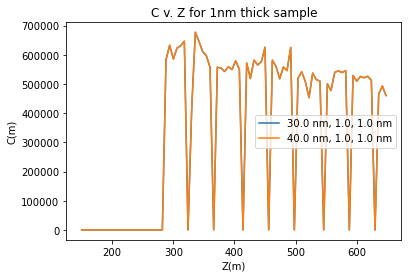

In [10]:
for key in {key: params for key, params in all_params.items() if params['Thickness_sample'] == 1}:
    data=all_data[key]
    thickness =all_params[key]['Thickness_sample']
    rtip= all_params[key]['Rtip']
    er=all_params[key]['eps_r']
    plt.plot(data['z'], data['c'], label= f'{rtip} nm, {er}, {thickness} nm')
    
    
plt.title('C v. Z for 1nm thick sample')    
plt.ylabel("C(m)")
plt.xlabel("Z(m)")
plt.legend()
plt.savefig("C' v. Z for 1nm thick sample 06-28-2021.png")

cut off last experiment because capacitance was off the scale

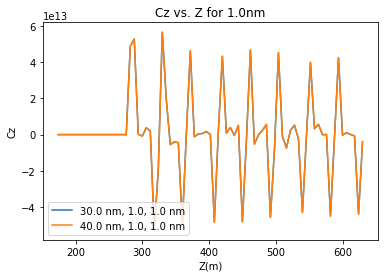

In [11]:
for key in {key: params for key, params in all_params.items() if params['Thickness_sample'] == 1}:
    data=all_data[key]
    thickness=all_params[key]['Thickness_sample']
    rtip= all_params[key]['Rtip']
    er=all_params[key]['eps_r']
    s=slice(4,-3)
    plt.plot(data['z'][s], data['cz'][s], label=f'{rtip} nm, {er}, {thickness} nm' )
    
plt.title('Cz vs. Z for 1.0nm')    
plt.ylabel("Cz")
plt.xlabel("Z(m)")
plt.legend()
plt.savefig("Cz v. Z for varying sample thickness, 06-28-2021.png")

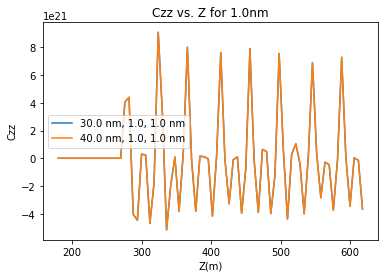

In [12]:
for key in {key: params for key, params in all_params.items() if params['Thickness_sample'] == 1}:
    data=all_data[key]
    thickness=all_params[key]['Thickness_sample']
    rtip= all_params[key]['Rtip']
    er=all_params[key]['eps_r']
    s=slice(5,-5)
    plt.plot(data['z'][s], data['czz'][s], label=f'{rtip} nm, {er}, {thickness} nm' )
    
plt.title('Czz vs. Z for 1.0nm')    
plt.ylabel("Czz")
plt.xlabel("Z(m)")
plt.legend()
plt.savefig("Czz v. Z for varying sample thickness, 06-28-2021.png")

In [13]:
params

{'n': 750,
 'm+': 750,
 'm-': 88,
 'h0': 0.5,
 'rho_max': 1000000.0,
 'z_max': 1000000.0,
 'min': 150.0,
 'max': 650.0,
 'istep': 12.0,
 'Rtip': 40.0,
 'half-angle': 15.0,
 'HCone': 15000.0,
 'RCantilever': 40000.0,
 'thickness_Cantilever': 500.0,
 'eps_r': 1.0,
 'Thickness_sample': 1.0,
 'Solving Method': 'LAPACK',
 'Test': 0,
 'Verbosity': 0,
 'Nuni': 1,
 'Equally spaced': False}

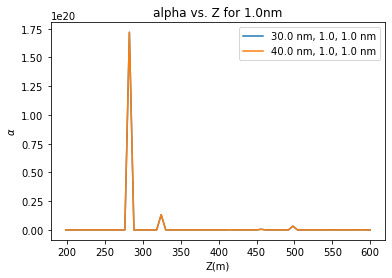

In [14]:
for key in {key: params for key, params in all_params.items() if params['Thickness_sample'] == 1}:
    data=all_data[key]
    thickness=all_params[key]['Thickness_sample']
    rtip= all_params[key]['Rtip']
    er=all_params[key]['eps_r']
    s=slice(8,-8)
    plt.plot(data['z'][s], data['alpha'][s], label=f'{rtip} nm, {er}, {thickness} nm' )
    
plt.title('alpha vs. Z for 1.0nm')    
plt.ylabel("$\\alpha$")
plt.xlabel("Z(m)")
plt.legend()
plt.savefig("Alpha v. Z for varying sample thickness, 06-28-2021.png")

In [15]:
data

{'z': array([150., 156., 162., 168., 174., 180., 186., 192., 198., 204., 210.,
        216., 222., 228., 234., 240., 246., 252., 258., 264., 270., 276.,
        282., 288., 294., 300., 306., 312., 318., 324., 330., 336., 342.,
        348., 354., 360., 366., 372., 378., 384., 390., 396., 402., 408.,
        414., 420., 426., 432., 438., 444., 450., 456., 462., 468., 474.,
        480., 486., 492., 498., 504., 510., 516., 522., 528., 534., 540.,
        546., 552., 558., 564., 570., 576., 582., 588., 594., 600., 606.,
        612., 618., 624., 630., 636., 642., 648.]),
 'c': array([6.28666602e-15, 6.28500131e-15, 6.28334283e-15, 6.28169013e-15,
        6.28004300e-15, 6.27840121e-15, 6.27676465e-15, 6.27513309e-15,
        6.27350632e-15, 6.27188422e-15, 6.27026658e-15, 6.26865338e-15,
        6.26704441e-15, 6.26543956e-15, 6.26383871e-15, 6.26224176e-15,
        6.26064870e-15, 6.25905931e-15, 6.25747349e-15, 6.25589133e-15,
        6.25431262e-15, 6.25273726e-15, 6.25116534e-15, 5.83

In [16]:
from scipy.optimize import curve_fit


In [17]:
def Cz_model(z, a, n, b,):
    return(a*z**n + b)

In [18]:
all_data.keys()

dict_keys(['SSN Tirmzi F\\0343-RR_SSNTirmzi-0000\\', 'SSN Tirmzi F\\0345-RR_SSNTirmzi-0001\\'])

In [19]:
data= all_data['capsol-calc\\0001-capsol\\']
z= data['z'][1:-1]
cz= data['cz'][1:-1]

KeyError: 'capsol-calc\\0001-capsol\\'

In [ ]:
popt, pcov= curve_fit(Cz_model, z, cz, p0=[cz[0]*z[0], -1, 0])
a=popt[0]
n=popt[1]
b=popt[2]
std_devs= np.sqrt(pcov.diagonal())
sigma_a = std_devs[0]
sigma_n = std_devs[1]
model_output= Cz_model(z, a, n, b)
rmse= np.sqrt(np.mean((cz - model_output)**2))


In [ ]:
f"a= {a} ± {sigma_a}"

In [ ]:
f"n= {n}± {sigma_n}"

In [ ]:
model_output

In [ ]:
"Root Mean Square Error"

In [ ]:
rmse/np.mean(-cz)